## Introduction to Worked Example

### Marketing Causal Inference Study

### Introduction

Our study dives into a wide range of marketing data to understand how spending on advertising affects customer actions and sales results. We're graduate students focusing on marketing analytics, aiming to find direct links that show how marketing efforts change the way consumers behave and lead to different sales outcomes.

We're working with a detailed dataset that includes advertising spending, sales figures, product details, and customer satisfaction scores (Net Promoter Scores, NPS) from 2015 to 2016. This diverse set of data allows us to study the relationship between marketing strategies and consumer reactions in a practical environment.

### Dataset Overview

1. **Investment Data (`df_investment`):** This dataset encapsulates monthly media spending across various channels, including TV, Digital, Sponsorship, Content Marketing, Online Marketing, Affiliates, SEM, Radio, and others. It provides a granular view of the company's allocation of marketing budget, enabling an analysis of investment efficiency and channel effectiveness.

2. **Sales Data (`df_Sales`):** Sales data is detailed with transaction-level information, including product categories, units sold, and gross merchandise value (GMV). This dataset is pivotal for understanding the direct output of marketing efforts in terms of sales performance.

3. **Net Promoter Score (NPS) Data (`df_NPS_score`):** NPS scores, collected monthly, serve as a proxy for customer satisfaction and brand loyalty. Analyzing NPS in conjunction with media investments and sales data allows for an evaluation of the qualitative impact of marketing strategies.

4. **Product (`df_Product`):** Offering insights into the product mix, this dataset includes information on product types, frequency of sales, and their respective shares of total sales. It's crucial for understanding how different products contribute to overall sales and how they are influenced by marketing investments.

5. **Additional Sales and Marketing Data (`df_first_file`, `df_second_file`):** These datasets provide further layers of detail regarding sales names, promotional activities, and revenue generated from different product categories. They enrich the analysis by linking marketing activities to sales outcomes across different segments of the product portfolio.

### Objectives

- **Causal Inference:** At the core of our study lies the quest to identify causal relationships between marketing investments and sales outcomes. We aim to determine which media channels are most effective in driving sales and how changes in investment levels impact sales volumes and customer sentiment.

- **Channel Effectiveness:** By dissecting the media investment data, we intend to assess the performance and ROI of each marketing channel. This analysis will help in optimizing the media mix for future marketing campaigns.

- **Product Mix Optimization:** Through the lens of the product listings and sales data, we will explore the interdependencies between product offerings and sales performance. The goal is to recommend strategies for product mix optimization that align with consumer preferences and market trends.

- **Consumer Sentiment Analysis:** The study will also delve into the relationship between marketing activities, sales performance, and customer sentiment, as measured by NPS. Understanding this linkage is vital for crafting marketing strategies that not only boost sales but also enhance customer loyalty and brand perception.

### Methodology

The analysis will be carried out using a mix of descriptive analytics, time-series analysis, and causal impact modeling. We will employ statistical methods to test for relationships and causality, including Granger causality tests and the CausalImpact package for Bayesian structural time series analysis. Our approach will be iterative, with a continuous cycle of hypothesis formulation, testing, and refinement.

### Expected Outcomes

By the conclusion of this study, we aim to provide actionable insights into how marketing investments can be strategically allocated to maximize sales, improve customer satisfaction, and optimize the product portfolio. We anticipate that our findings will offer valuable guidance for marketing strategy development and execution, contributing to the academic body of knowledge on marketing effectiveness and causal inference in the business domain.


## Worked Example

### Importing Libraries

In [38]:
from logging import warning
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from causalimpact import CausalImpact
from statsmodels.tsa.stattools import grangercausalitytests

### Creating Dataset

In [2]:
## Investment
url = "https://raw.githubusercontent.com/nitant98/INFO7390/main/Investment.csv"
df_investment = pd.read_csv(url, sep=",")

## NPS Score
url = "https://raw.githubusercontent.com/nitant98/INFO7390/main/NPSscore.csv"
df_NPS_score = pd.read_csv(url, sep=",")

## Products
url = "https://raw.githubusercontent.com/nitant98/INFO7390/main/Product.csv"
df_Product = pd.read_csv(url, sep=",")

## Sales
url_1 = "https://raw.githubusercontent.com/nitant98/INFO7390/main/Sales_1.csv"
url_2 = "https://raw.githubusercontent.com/nitant98/INFO7390/main/Sales_2.csv"

df_sales_1 = pd.read_csv(url_1, sep=",")
df_sales_2 = pd.read_csv(url_2, sep=",")

df_Sales = pd.concat([df_sales_1, df_sales_2], ignore_index=True)


## firstfile
url_1 = "https://raw.githubusercontent.com/nitant98/INFO7390/main/firstfile_1.csv"
url_2 = "https://raw.githubusercontent.com/nitant98/INFO7390/main/firstfile_2.csv"

df_firstfile_1 = pd.read_csv(url_1, sep=",")
df_firstfile_2 = pd.read_csv(url_2, sep=",")

df_first_file = pd.concat([df_firstfile_1, df_firstfile_2], ignore_index=True)

## Secondfile
url = "https://raw.githubusercontent.com/nitant98/INFO7390/main/Secondfile.csv"
df_second_file = pd.read_csv(url, sep=",")

### Exploratory Data Analysis

###### Data Cleaning

In [3]:
# Impute NAN values with 0
df_investment=df_investment.fillna(0)
df_Sales=df_Sales.fillna(0)
df_first_file=df_first_file.fillna(0)
df_second_file=df_second_file.fillna(0)

In [4]:
# Convert 'Date' column to datetime format
df_NPS_score['Date'] = pd.to_datetime(df_NPS_score['Date'])

In [14]:
# Ensure the 'Date' column is of type datetime
df_second_file['Date'] = pd.to_datetime(df_second_file['Date'])


##### 1. NPS (Net promoter Score) score distribution over the years

The code takes a DataFrame df_NPS_score containing two columns: 'Date' and 'NPS'. First, it converts the 'Date' column to datetime format to ensure accurate plotting over time. Then, it sets the figure size to 15x5 inches using sns.set(). Finally, it uses Seaborn's lineplot function to plot the Net Promoter Score ('NPS') over the corresponding dates, resulting in a visual representation of how the NPS varies over the months provided in the DataFrame.


<AxesSubplot:xlabel='Date', ylabel='NPS'>

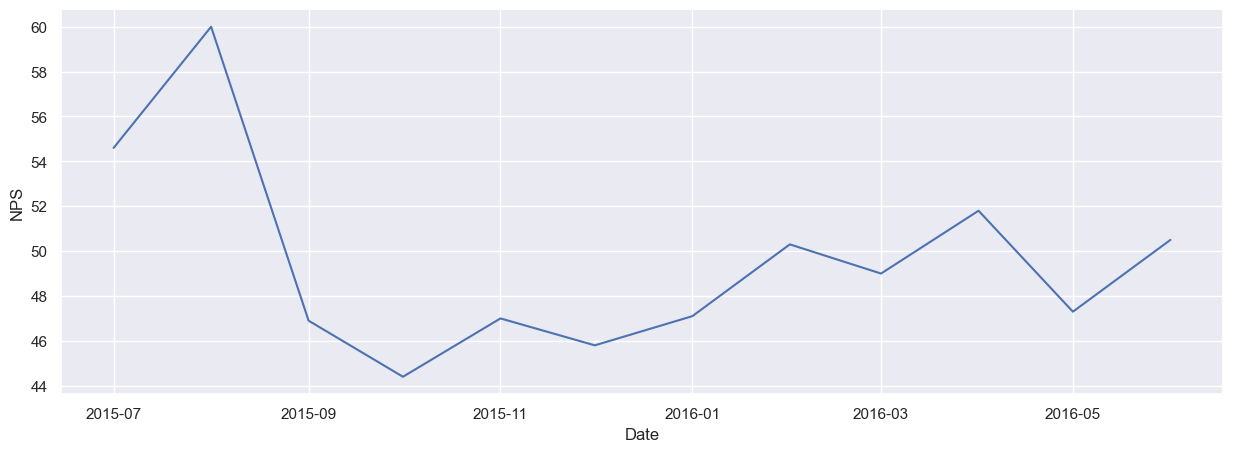

In [5]:
# Setting the figure size for the plot
sns.set(rc={'figure.figsize':(15,5)})

# Create the Line Plot
sns.lineplot(data=df_NPS_score, x="Date", y="NPS")

The graph shows fluctuations in NPS over time, with a notable peak around August 2015 and several ups and downs thereafter, indicating changes in customer satisfaction or likelihood to recommend the product/service over the given months.

##### 2. Spending by Channel


The hist_plot function cleans the DataFrame by dropping specified time-related and redundant columns. It then plots histograms for the remaining columns.

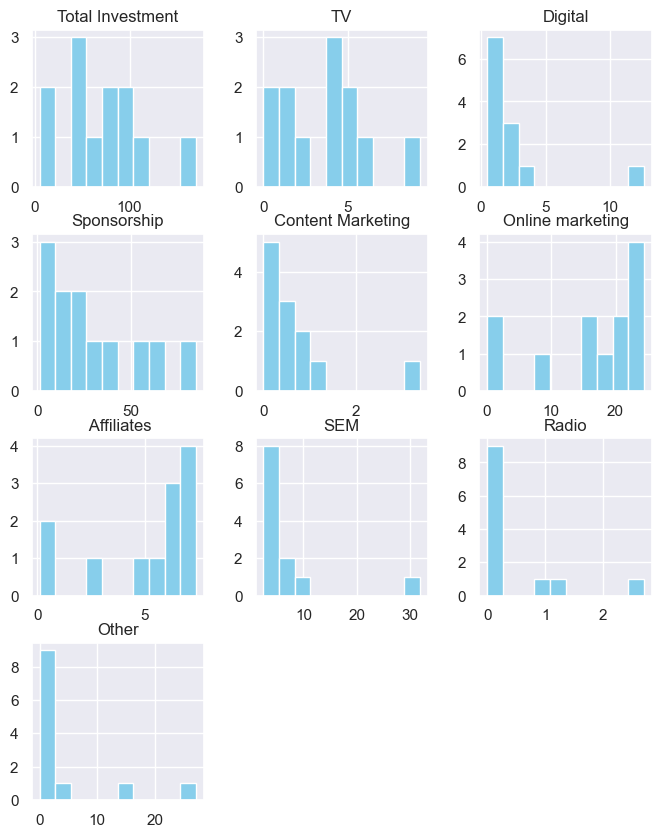

In [6]:
# Custom function to plot bar graph df & drop redundant columns
def hist_plot(df, x=None):
  b=['date', 'Date','Month','Year','Unnamed:0', 'month']
  a=[i for i in df.columns if i not in b ]
  df=df[a]
  fig = plt.figure(figsize = (8,10))
  ax = fig.gca()
  df.hist(ax=ax, color = "skyblue")
  plt.show()
     

# Plot histogram for media investment
hist_plot(df_investment)

The histograms represent the distributions of media investment across various channels:

- **Total Investment**: Shows a broad range of investments with some notably large values, indicating a few cases of high spending.
- **TV**: Displays a variable investment distribution, with a clustering of lower amounts and occasional higher values.
- **Digital**: Predominantly lower investments with sporadic occurrences of higher investments, implying a focus on smaller-scale digital campaigns.
- **Sponsorship**: The skewed distribution suggests that sponsorships are typically of lower monetary value with few exceptions.
- **Content Marketing**: Investments are diverse, yet there's a tendency towards more modest sums.
- **Online Marketing**: A concentration of low investments with a long tail of a few high investments, possibly indicative of a few aggressive online campaigns.
- **Affiliates**: Most investments are on the lower end, with the histogram peak at lower investment levels.
- **SEM (Search Engine Marketing)**: Exhibits a broad spread in investment amounts, showing a variety of spending strategies.
- **Radio**: Less frequent and generally lower investments, suggesting a smaller focus on radio as a channel compared to others.


**We can see that highest spending bracket is for online marketing while lowest spending is for Radio.**

#### 3. Checking the year wise contribution of each channel to total investment

In [11]:
def calculate_percentages_investment(df):
  c=[]
  for j in (0,1):
    b=[]
    for i in range(1,len(df.columns)):
      b.append(round((df.iloc[j,i]/df.iloc[j,0])*100,2))
    c.append(b)
  return (c)
     

df=df_investment.drop(columns=["Month"])
df=df.groupby(df.Year).sum()
data=calculate_percentages_investment(df)
columns=['TV %', 'Digital %', 'Sponsorship %', 'Content Marketing %',
       'Online marketing %', ' Affiliates %', 'SEM %', 'Radio %', 'Other %']
percentage_df=pd.DataFrame(data, columns=columns, index=[2015,2016])
percentage_df

,TV %,Digital %,Sponsorship %,Content Marketing %,Online marketing %,Affiliates %,SEM %,Radio %,Other %
2015,4.43,4.97,50.81,1.19,18.88,5.82,13.88,0.00,0.0
2016,6.15,1.90,34.62,0.68,27.35,8.85,7.28,1.18,12.0


In 2016, there was a noticeable increase in the percentage of investment in Affiliates, Online Marketing, Radio, and Other advertising methods compared to 2015. Conversely, there was a significant reduction in the share of investment in TV, Digital, Sponsorship, SEM, and Content Marketing. This shift suggests a strategic reallocation of marketing funds toward emerging and more engaging advertising channels over traditional ones.

##### 4. What we can do further is to check the profitability , revenue & cost distribution for each of this channel in both year.

In [13]:
df_second_file

,Unnamed: 0,month,Revenue_Camera,Revenue_CameraAccessory,Revenue_EntertainmentSmall,Revenue_GameCDDVD,Revenue_GamingHardware,total_gmv,Units_Camera,Units_CameraAccessory,...,Digital,Sponsorship,Content.Marketing,Online.marketing,Affiliates,SEM,Radio,Other,Date,NPS
6,7,Jul 2015,4.614023e+07,1.755561e+07,8.463275e+07,1.075666e+07,1.785191e+07,1.769372e+08,3519,12996,...,25000000.0,74000000.0,0.0,13000000.0,5000000.0,50000000.0,0.0,0.0,2015-07-01,54.6
7,8,Aug 2015,6.155000e+04,4.227800e+04,2.586660e+05,1.805400e+04,3.864800e+04,4.191960e+05,4,38,...,13000000.0,11000000.0,0.0,1000000.0,1000000.0,25000000.0,0.0,0.0,2015-08-01,60.0
8,9,Sep 2015,1.370821e+08,4.620538e+07,1.783461e+08,2.477973e+07,4.007520e+07,4.264885e+08,9348,36051,...,14000000.0,628000000.0,6000000.0,164000000.0,50000000.0,62000000.0,0.0,0.0,2015-09-01,46.9
9,10,Oct 2015,2.427325e+08,3.216185e+07,1.817664e+08,2.109576e+07,3.177574e+07,5.095323e+08,15726,27088,...,126000000.0,847000000.0,34000000.0,244000000.0,70000000.0,319000000.0,0.0,0.0,2015-10-01,44.4
10,11,Nov 2015,1.635928e+08,2.373963e+07,9.420911e+07,1.931035e+07,3.363579e+07,3.344877e+08,8972,18727,...,13000000.0,142000000.0,2000000.0,196000000.0,66000000.0,52000000.0,0.0,0.0,2015-11-01,47.0
11,12,Dec 2015,2.070381e+08,2.861669e+07,1.247312e+08,2.157780e+07,5.417289e+07,4.361366e+08,11689,20372,...,31000000.0,567000000.0,11000000.0,225000000.0,68000000.0,112000000.0,0.0,0.0,2015-12-01,45.8
0,1,Jan 2016,1.869358e+08,2.638743e+07,1.093020e+08,1.688487e+07,4.770016e+07,3.872102e+08,10442,22525,...,5000000.0,42000000.0,9000000.0,229000000.0,74000000.0,42000000.0,27000000.0,271000000.0,2016-01-01,47.1
1,2,Feb 2016,1.549989e+08,2.536880e+07,1.011725e+08,1.510002e+07,3.561454e+07,3.322547e+08,8606,25406,...,19000000.0,117000000.0,6000000.0,199000000.0,65000000.0,49000000.0,0.0,0.0,2016-02-01,50.3
2,3,Mar 2016,1.861417e+08,2.676195e+07,1.202884e+08,2.299259e+07,4.802562e+07,4.042102e+08,9969,25484,...,21000000.0,416000000.0,4000000.0,184000000.0,62000000.0,52000000.0,9000000.0,159000000.0,2016-03-01,49.0
3,4,Apr 2016,1.470531e+08,2.534451e+07,9.808951e+07,2.081085e+07,4.848195e+07,3.397800e+08,8006,25926,...,9000000.0,243000000.0,0.0,165000000.0,57000000.0,42000000.0,0.0,0.0,2016-04-01,51.8


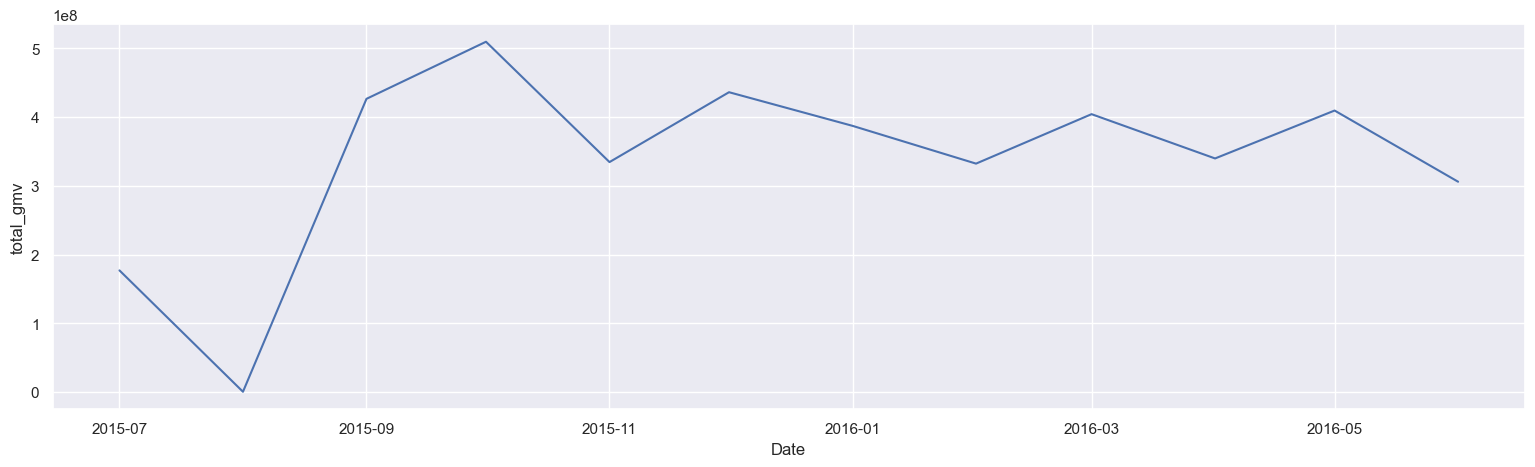

In [16]:
# Sort the DataFrame by the 'Date' column
df_second_file = df_second_file.sort_values(by=["Date"])

sns.set(rc={'figure.figsize':(19,5)})
sns.lineplot(data=df_second_file, x='Date', y='total_gmv')

# Show the plot
plt.show()

<AxesSubplot:xlabel='Date', ylabel='total_Units'>

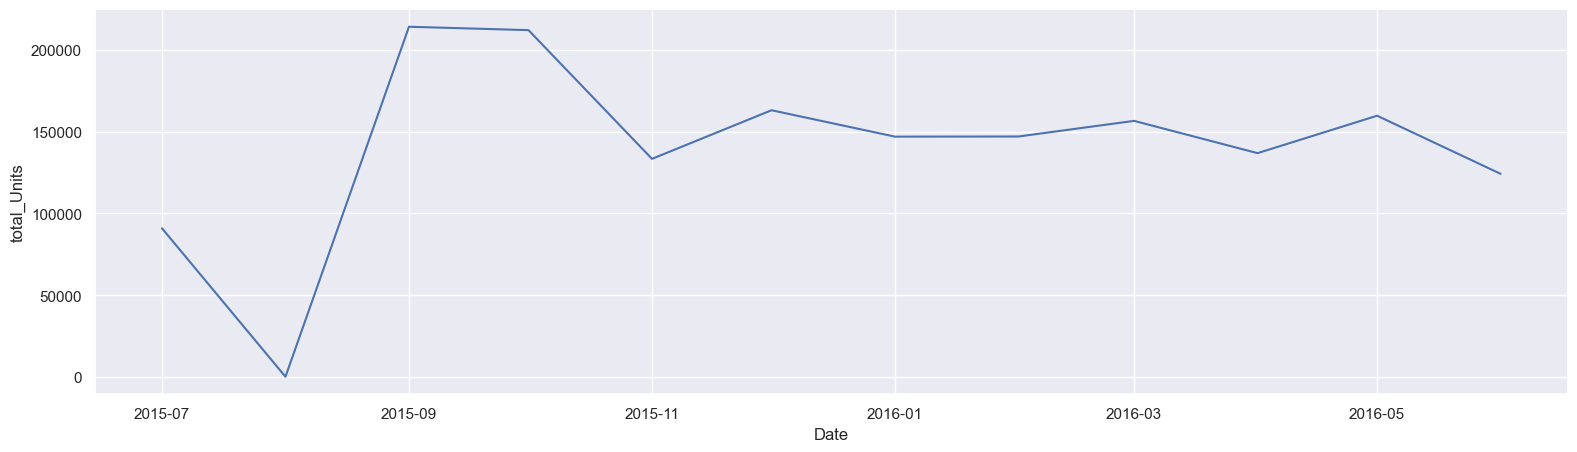

In [18]:
sns.set(rc={'figure.figsize':(19,5)})
sns.lineplot(data = df_second_file, x='Date', y='total_Units')

<AxesSubplot:xlabel='Date', ylabel='Total.Investment'>

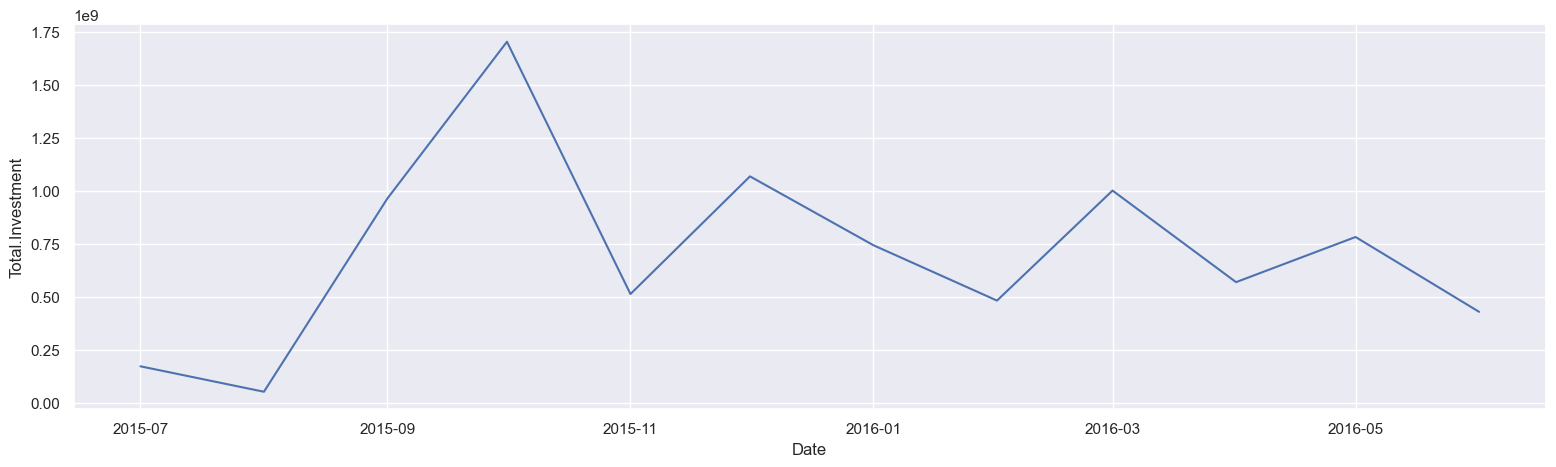

In [19]:
sns.set(rc={'figure.figsize':(19,5)})
sns.lineplot(data = df_second_file, x='Date', y='Total.Investment')

The above graphs shows total_investment, total_units & total_gmv by timeframe

#### 5. We had observed that there is change in investment policy for marketing channel as compared to 2015 in 2016.

<AxesSubplot:>

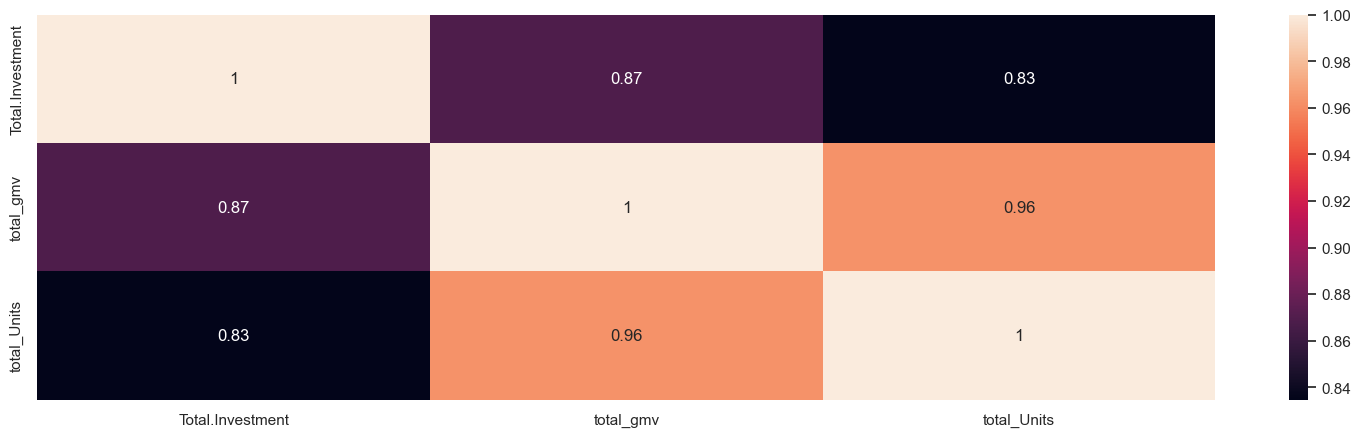

In [21]:
sns.heatmap(df_second_file[['Total.Investment','total_gmv', 'total_Units']].corr(), annot=True)

The provided data suggests a direct correlation between investment in advertising and the number of units sold, as well as the resulting profits. As investment increases, there's a discernible positive impact on both sales volume and revenue, indicating a linear relationship between financial input in marketing and sales outcomes.

<AxesSubplot:xlabel='Total.Investment', ylabel='total_Units'>

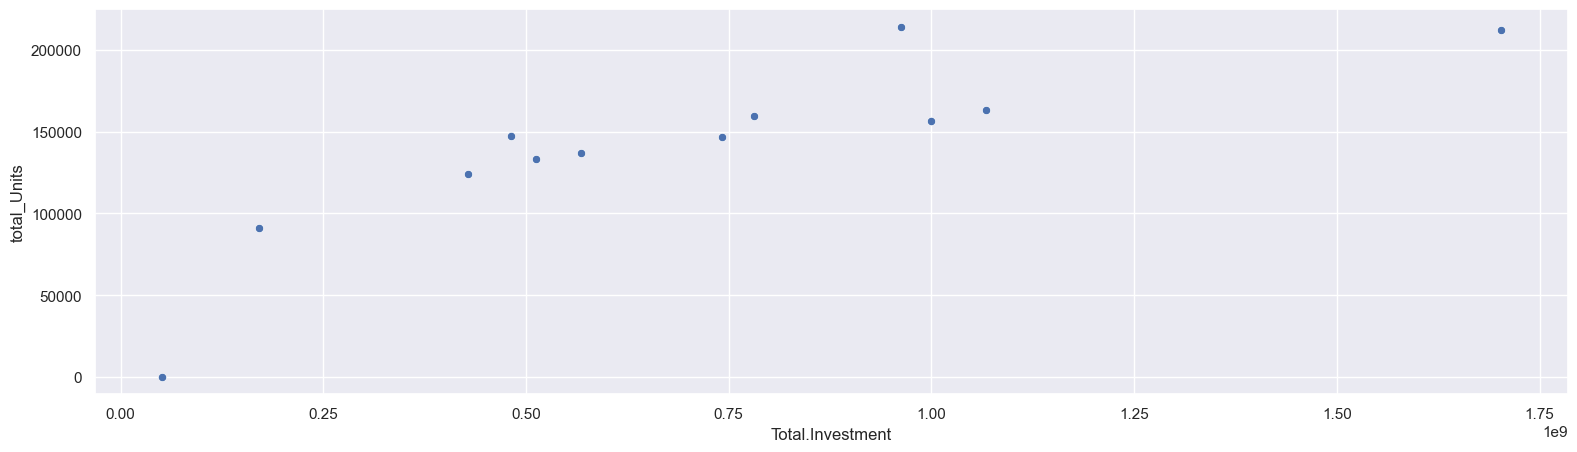

In [22]:
sns.scatterplot(x=df_second_file['Total.Investment'], y=df_second_file['total_Units'])


There is a linear relationship between the total investment & Units sold. Therefore we can say that the positive increase in investment of advertising will increase the sales. But we need to further build a casual model to check if this relationship holds true.

### Building a Causal Impact Model

In [28]:
# We will consider the Dec 2015 to be the cutoff period for pre and post period analysis
df = df_second_file[['Date', 'Total.Investment', 'total_Units']].set_index('Date')

# Convert 'Date' from string to datetime to facilitate time-based indexing and analysis
df.index = pd.to_datetime(df.index)
df

,Total.Investment,total_Units
Date,,
2015-07-01,1.710000e+08,90938
2015-08-01,5.100000e+07,275
2015-09-01,9.630000e+08,214008
2015-10-01,1.702000e+09,211939
2015-11-01,5.120000e+08,133345
2015-12-01,1.067000e+09,163021
2016-01-01,7.420000e+08,146899
2016-02-01,4.810000e+08,146990
2016-03-01,1.000000e+09,156527


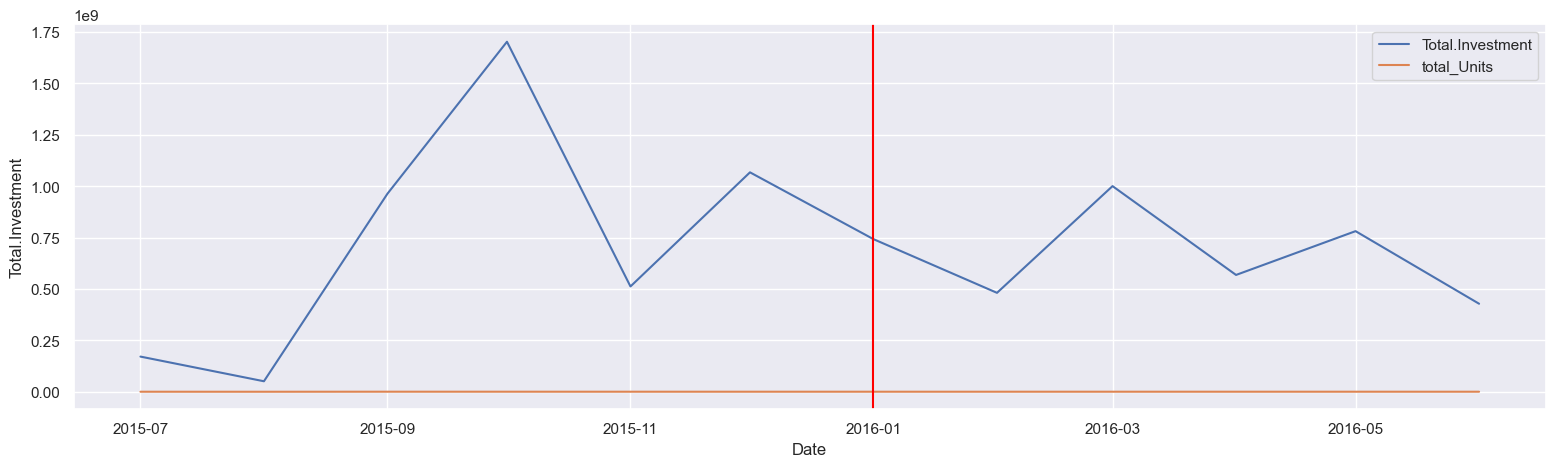

In [29]:
# Lets Visualize the time series data

sns.set(rc={'figure.figsize':(19,5)})
sns.lineplot(x=df.index, y=df['Total.Investment'])
sns.lineplot(x=df.index, y=df['total_Units'])
plt.axvline(x= df.index[6], color='red')
plt.legend(labels = ['Total.Investment', 'total_Units'])
     

The graph showcases a time series from July 2015 to May 2016, plotting 'Total.Investment' and 'total_Units' on different scales. A red vertical line marks December 2015 as the cutoff for pre and post period analysis. There appears to be a substantial spike in total investment around September and October of 2015, followed by a notable decline. However, the 'total_Units' line remains relatively flat throughout, indicating that the fluctuations in investment during this period may not have had a corresponding impact on the number of units sold.

In [34]:
# Set pre-period
pre_period = [str(df.index.min())[:10], str(df.index[5])[:10]]
# Set post-period
post_period = [str(df.index[6])[:10], str(df.index.max())[:10]]
# Print out the values
print(f'The pre-period is {pre_period}')
print(f'The post-period is {post_period}')
     
# We will calculate the Raw Difference between the pre and the post periods.

# Calculate the pre-daily average
pre_daily_avg = df['total_Units'][:6].mean()
# Calculate the post-daily average
post_daily_avg = df['total_Units'][6:].mean()
# Print out the results
print(f'The pre-treatment daily average is {pre_daily_avg}.')
print(f'The post-treatment daily average is {post_daily_avg}.')
print(f'The raw difference between the pre and the post treatment is {post_daily_avg - pre_daily_avg}.')
     

The pre-period is ['2015-07-01', '2015-12-01']
The post-period is ['2016-01-01', '2016-06-01']
The pre-treatment daily average is 135587.66666666666.
The post-treatment daily average is 145182.33333333334.
The raw difference between the pre and the post treatment is 9594.666666666686.


The average daily units sold during the pre-treatment period was 135,587.66, while it increased to 145,182.3 in the post-treatment period, resulting in a raw difference of 9,594.66. This raw difference substantially exceeds the actual causal impact of 10. This discrepancy underscores the necessity of a causal analysis to avoid overestimating the true effect of the treatment.

### Causal Impact Analysis on Time Series

##### The causality analysis has two assumptions:

**Assumption 1:** Holds that at least one control time series, which closely relates to the outcome variable yet remains unaffected by the intervention, exists. If this is not the case, it could lead to incorrect inferences regarding the presence, direction, or scale of the effect of the intervention.

**Assumption 2:** Stipulates that the relationship between the control and the outcome time series should be consistent across both the pre-intervention and post-intervention periods.

The python CausalImpact package has a function called CausalImpact that implements a Bayesian Structural Time Series Model (BSTS) on the backend. It has three required inputs:


a) The variable data should be assigned the name of the Python DataFrame that contains the data.

b) The pre_period variable should be set with the index values that mark the beginning and the end of the period before the intervention took place.

c) The post_period variable should capture the index values that define the start and the end of the period after the intervention occurred.

D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Softwares\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


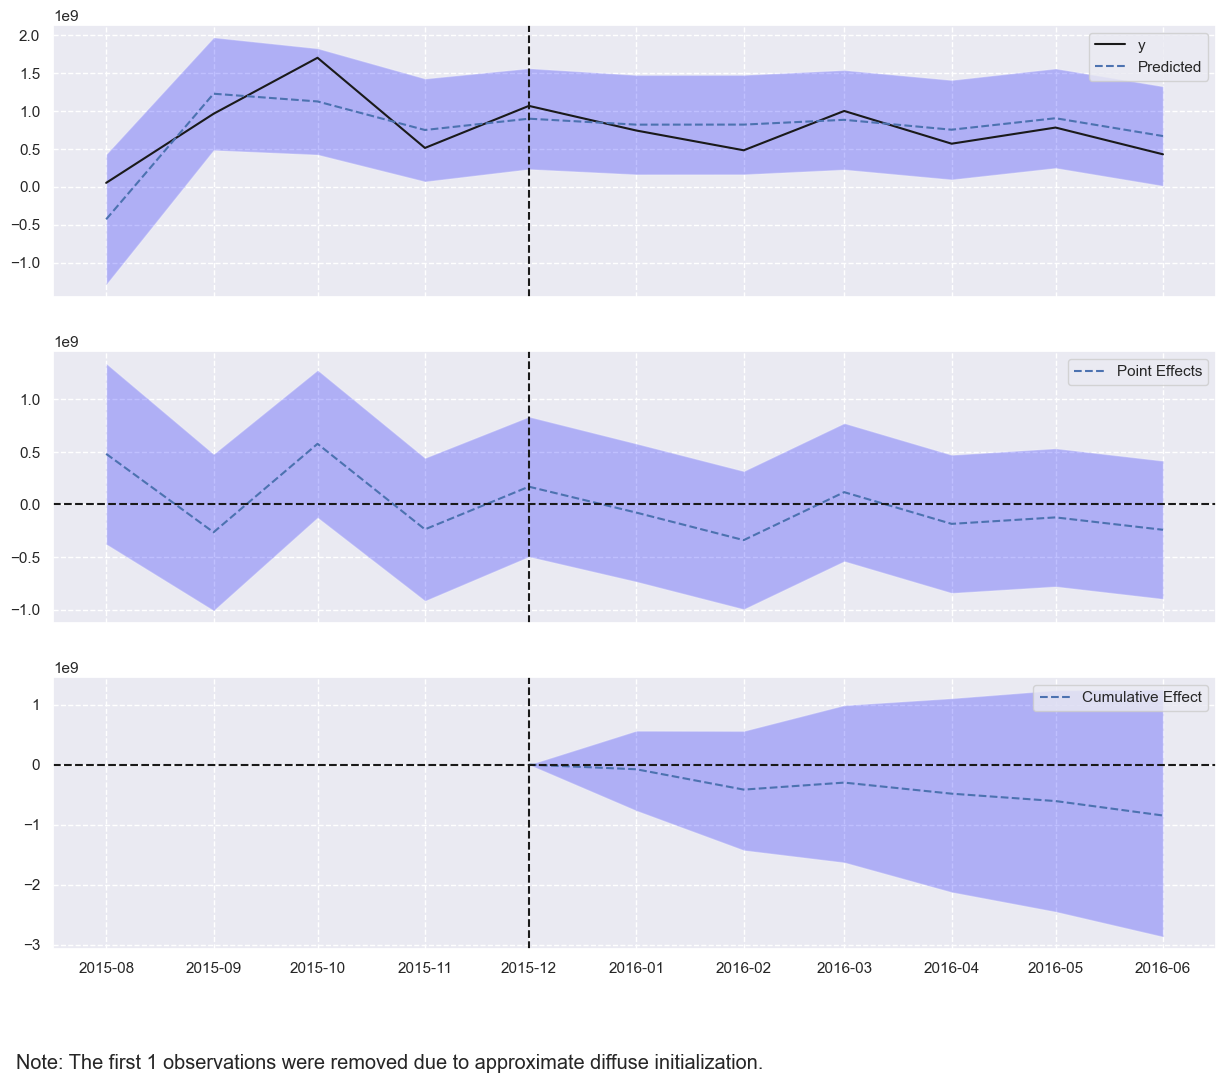

In [35]:

# Causal impact model
impact = CausalImpact(data=df, pre_period=pre_period, post_period=post_period)
# Visualization
impact.plot()

The top graph compares the observed values (solid line) against the predicted values (dashed line) if the intervention had not occurred. The shaded area represents the confidence interval for the predictions.

The middle graph shows the point effects, which are the differences between observed and predicted values at each time point. The shaded area again provides the confidence interval around these point estimates.

The bottom graph presents the cumulative effect of the intervention over time. The widening shaded area suggests increasing uncertainty as we move further from the intervention point.

The note at the bottom indicates that the first observation was removed to adjust for initial conditions that might skew the analysis. Overall, the graphs aim to quantify and visualize the immediate and accumulating effects of an intervention over time, considering variability and prediction confidence.

In [36]:
# Causal impact summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    666666666.67       4000000000.0
Prediction (s.d.)         808016910.39 (175084336.97)4848101462.33 (1050506021.83)
95% CI                    [458220352.01, 1144538341.46][2749322112.08, 6867230048.76]

Absolute effect (s.d.)    -141350243.72 (175084336.97)-848101462.33 (1050506021.83)
95% CI                    [-477871674.79, 208446314.65][-2867230048.76, 1250677887.92]

Relative effect (s.d.)    -17.49% (21.67%)   -17.49% (21.67%)
95% CI                    [-59.14%, 25.8%]   [-59.14%, 25.8%]

Posterior tail-area probability p: 0.21
Posterior prob. of a causal effect: 78.72%

For more details run the command: print(impact.summary('report'))


In [37]:
# Causal impact report
print(impact.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 666666666.67. In the absence of an
intervention, we would have expected an average response of 808016910.39.
The 95% interval of this counterfactual prediction is [458220352.01, 1144538341.46].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -141350243.72 with a 95% interval of
[-477871674.79, 208446314.65]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 4000000000.0.
Had the intervention not taken place, we would have expected
a sum of 4848101462.33. The 95% interval of this prediction is [2749322112.08, 6867230048.76].


The above results are given in terms of abs

**As the Caussal Impact model has given us the decision with CI of 78.2 %, we can say that there is no relation between the investment made and actual change in volume sold. But we also need to verify it once more rather than making a errorneous assumption.**

##### Checking the stationarity of time series using KPSS and ADF test

In [39]:
from statsmodels.tsa.stattools import kpss

def kpss_test(df):    
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
     

print('KPSS Test: Total Units series')
kpss_test(df['total_Units'])


print('KPSS Test: Total Investment series')
kpss_test(df['Total.Investment'])

KPSS Test: Total Units series
KPSS Statistic: 0.14210787901129968
p-value: 0.1
num lags: 0
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: Total Investment series
KPSS Statistic: 0.112680444607629
p-value: 0.1
num lags: 0
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


Since the p-values for both the 'Total Units' and 'Total Investment' series are 0.1, which is above the common significance level of 0.05, we cannot reject the null hypothesis of stationarity for either time series. This implies that both series can be considered stationary, and thus it is appropriate to move forward with **Granger causality** tests to explore potential predictive relationships between the variables.

In [41]:
maxlag=2
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)

,Total.Investment_x,total_Units_x
Total.Investment_y,1.0000,0.0001
total_Units_y,0.0012,1.0000


The Granger causality matrix reveals an intriguing result, contradicting the findings from the Bayesian structural time series causal impact model. It shows a p-value below the 0.05 threshold for 'Total.Investment' as a predictor of 'total_Units', suggesting a potential causative relationship. However, this does not provide definitive proof of causality. Therefore, the conclusion regarding causality remains ambiguous at this point, and it may be beneficial to consider additional tests to further investigate the relationship.

### Summary

In our marketing causal inference study, we analyzed comprehensive marketing data from 2015 to 2016 to understand the effect of advertising spend on consumer behavior and sales outcomes. Utilizing datasets covering investment details, sales figures, and Net Promoter Scores, we examined the interplay between marketing efforts and customer responses. Our primary goal was to establish causal links between different marketing channels and sales results.

We conducted a series of statistical tests, including the KPSS test, which confirmed the stationarity of our time series data, allowing us to proceed with Granger causality tests. These tests revealed a potential causal link between 'Total.Investment' and 'total_Units', indicating that investment in advertising could influence sales. However, given the conflicting results from the Bayesian structural time series model, we concluded that further investigation is necessary to draw definitive conclusions about the causality between marketing investments and sales performance.

### References

https://tech.walmart.com/content/walmart-global-tech/en_us/news/articles/using-science-to-evaluate-marketing-campaign-effectiveness.html#:~:text=For%20instance%2C%20if%20a%20business,promotion%20and%20the%20other%20not.
    
https://causalens.com/resources/blogs/causal-inference-for-decision-making/

https://www.saxifrage.xyz/post/causal-inference

https://www.linkedin.com/advice/0/how-do-you-measure-causal-impact-marketing-experiments

https://www.kaggle.com/code/chrisbow/inferring-causal-effect-of-marketing-on-sales

https://blog.marvik.ai/2023/10/02/introduction-to-causal-inference-understanding-cause-and-effect-relationships/

https://www.advancedmartech.com/unlocking-the-power-of-causal-inference-for-marketing-analytics/

https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3035502